# IMPORTS

In [6]:
import cv2
import os
import re 
import warnings
import tensorflow

import keras
import matplotlib.pyplot as plot
import matplotlib.image as mpimg

import numpy as np
import glob
import pickle


# PARSE FACE DATASET

In [7]:
base_directory = 'Dataset/VISA_Face/VISA_Face'
face_images = []
def parse_face_dataset():
    for path in glob.iglob(base_directory+'/*'):
        filename = os.path.basename(path)
        
        #string manipulation
        underscore_index = filename.find("_")
        filename_parsed = filename[:underscore_index]    
        match = re.search(r"(.*?)_2017_001", filename)
        filename_parsed = match.group(1)
        
        label = filename_parsed
        # print('label: ' + label)
        # print('path: ' + path )
        image_id = 0
        
        for image_path in glob.iglob(path + '/*'):
            # print('image path: ' + image_path)

            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (400, 300))
            face_images.append([image, image_id, label])
            image_id += 1
            
    print('face images: ' + str(len(face_images)))   
    return face_images   

# FACE DETECTION

In [8]:
def face_detection(face_images, display):
    
    pre_processed_images = []
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')

    # Draw rectangle around the faces and crop the faces
    for face_image in face_images:
        (image, image_id, label) = face_image
        image_id += 1
        face = face_cascade.detectMultiScale(image, 1.1, 4)

        for (x, y, width, height) in face:
            face = image[y:y + height, x:x + width]
            cv2.imshow("face", face)
            cv2.imwrite(
                'Processed/'+str(label) + '.' +
                str(image_id) + '.Face' + '.jpg',
                face
            )
            pre_processed_images.append([face, image_id, label])

            image_unboxed = image.copy()

            image_cropped = image_unboxed[y:y + height,
                                            x:x + width,]

            image_boxed = cv2.rectangle(
                image,
                (x, y),
                (x + width, y + height),
                (255, 0, 0),
                2,
            )
    
    print("face image preprocessing done")
    if (display):
        fig, axes = plot.subplots(1, 3, figsize=(12, 5))

        axes[0].imshow(image_unboxed)
        axes[0].set_title('Original Image')
        axes[0].axis('off')  # Hide axes for cleaner presentation

        axes[1].imshow(image_boxed)
        axes[1].set_title('Haar Face Cascade Classifier Detection')
        axes[1].axis('off')

        axes[2].imshow(image_cropped)
        axes[2].set_title('Cropped Face')
        axes[2].axis('off')

        plot.tight_layout()
        plot.show()

# MAIN

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

face images: 36
face image preprocessing done


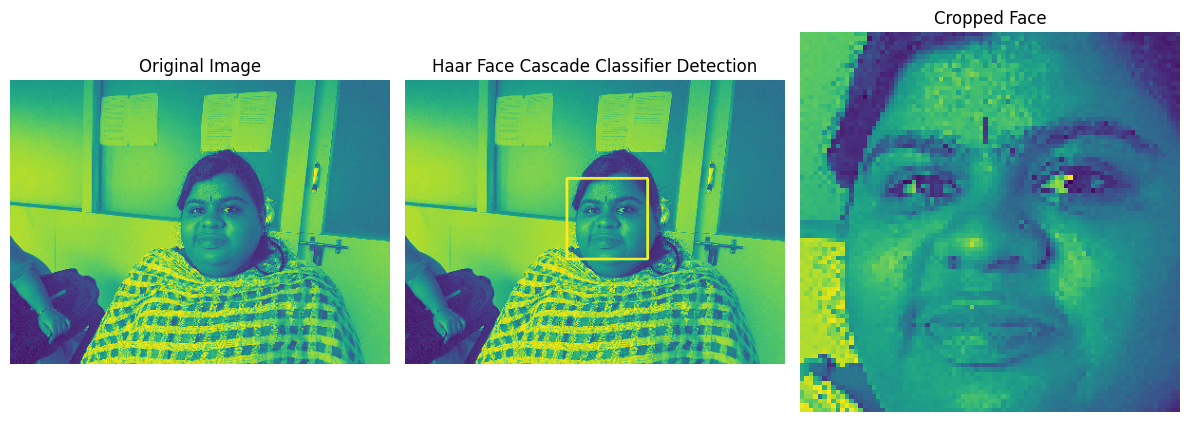

: 

In [9]:
face_images = parse_face_dataset()
face_detection(face_images, 1)